# Prometna Sigurnost - Tempe, USA



> Pripremljeno za seminar iz kolegija: Uvod u umjetnu inteligenciju

> Student: Vedran Kapitanović

> Prirodoslovno-Matematički fakultet u Splitu





## Uvod

U ovom projektu strojnim učenjem obrađujem podatke o prometnim nesrećama u gradu Tempe, u američkoj saveznoj državi Arizoni koristeći metodu slučajnih šuma (Random Forrest Regressor), s ciljem predviđanja uzroka nesreće, odnosno broja ozljeda pri nesreći. Podaci su strukturirani u tablici koja prikazuje razne parametre nesreće na temelju kojih želim napraviti regresijski model. Ovo je primjer modela koji se koristi za otkrivanje uzroka. Drugim riječima, u realnoj situaciji zanima nas na koji način model zaključuje. Iz tog razloga je dobro koristiti stabla odluke, upravo zbog njihove interpretabilnosti. Kao što se obično radi, ovdje ću unaprijediti model na slučajne šume, koje su nešto manje interpretabilne, ali uklanjaju glavne mane stabala odluke. Kao predložak za osnovu ovog projekta korišten je rad s poveznice: https://towardsdatascience.com/predicting-vehicle-accidents-with-machine-learning-ce956467fa74.

## Random Forrest Regressor

Jedna od često značajnijih mana stabala odluke je visoka varijanca modela.${[1]}$ To znači da će takav model biti jako sklon prenaučeosti, odnosno učenju šuma. Takav model će također biti jako ovisan o parametrima koji značajno dijele skup podataka. Metodom slučajnih šuma nastoje se rješiti ovi problemi i tako povećati točnost modela. To se postiže na način da se generira više stabala odluke od kojih će svako na nasumičan način odabrati samo dio skupa podataka i dio nezavisnih parametara.${[1]}$ Smanjivanjem skupa parametara koje svako stablo može koristiti smanjuje se korelacija među stablima, s obzirom da neće sva stabla biti oslonjena na neke parametre koji značajno dijele podatke. Smanjivanjem skupa podataka za svako stablo, također se smanjuje korelacija među stablima, te će teže doći do prenaučenosti. Konačna odluka se donosi kao prosjek odluka svih stabala. Takav pristup, u kojem je povećan broj stabala, a smanjena korelacija među njima dovodi do smanjenja varijance. S druge strane, to dovodi do povećanja bias-a (pristranosti). Ravnoteža između varijance i bias-a je centralni problem u izradi modela strojnog učenja.${[2]}$ U mnogim slučajevima vezanim za slučajne šume očekujemo da povećanje bias-a neće biti značajno, dok će smanjenje varijance biti značajno. Ova metoda smanjuje interpretabilnost modela, ali zaključivanje je i dalje moguće promatranjem pojedinih stabala.
<br>
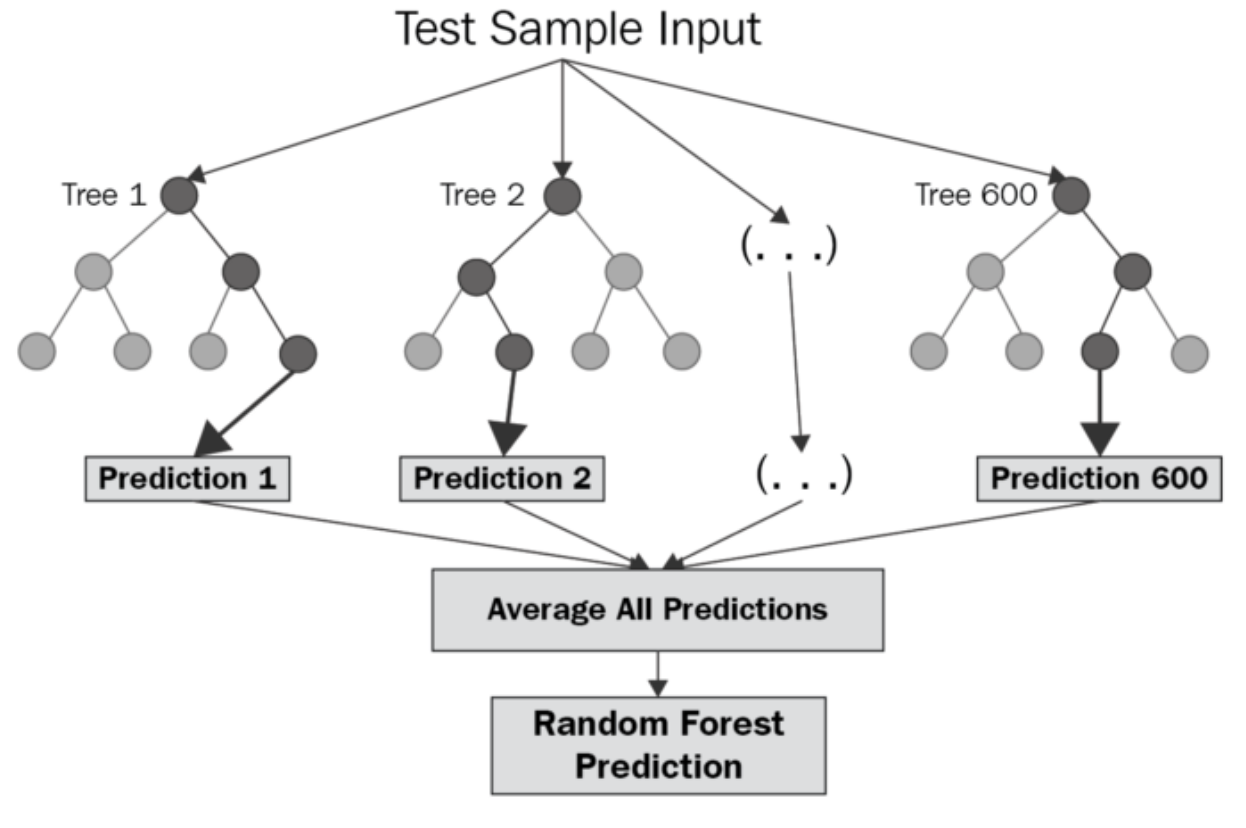

Na gornjoj slici prikazan je koncept metode slučajnih šuma.

## Prikupljanje podataka

### Instalacija biblioteka

In [1]:
%%time 
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes 
!pip install folium 
!pip install pysal
!pip install scipy
!pip install -U scikit-learn
!pip install seaborn --upgrade

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get

Ako izvršavanje čelije nije uspjelo, treba ponovno pokrenuti "Runtime".

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import requests
import seaborn as sns
print(sns.__version__)

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


0.11.2


### Prikupljanje i sortiranje podataka

In [3]:
# Get the data from url and request it as json file
url = 'https://data.tempe.gov/datasets/0c333bd164d64d62aa0ee6f99b1ccf82_0.geojson?outSR=%7B%22latestWkid%22%3A4326%2C%22wkid%22%3A4326%7D'
geojson = requests.get(url).json()

In [4]:
# Učitavanje podataka u GeoDataFrame pomoću Geopandas
crs = {'init': 'epsg:3851'}
gdf = gpd.GeoDataFrame.from_features(geojson['features'], crs=crs)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [5]:
# Podatke je moguće učitati i iz sesije
#gdf = gpd.read_file('1.08_Crash_Data_Report_(detail).geojson')

In [6]:
#gdf = gpd.GeoDataFrame(gdf, crs={'init': 'epsg:3851'})

Učitani skup podataka pretstavlja prometne nesreće koje su se dogodile između dva vozila, vozila i pješaka ili vozila i biciklicta. Svaki redak predstavlja jednu prometnu nesreću. Parametri prometne nesreće (stupci) odnose se na sam događaj, te na prvog (Drv1) i drugog (Drv2) sudionika nesreće.

Popis značenja parametara nesreće:
- Latitude, Longitude - geografske koordinate
- DateTime - datum i vrijeme
- StreetName - ime ulice
- CrossStreet - ulica križanja u blizini
- Distance - udaljenost do ulice križanja
- JunctionRelation - Tip spoja ceste na mjestu nesreće
- Totalinjuries - Ukupni broj ozljeda
- Totalfatalities - ukupni broj smrtnih slučajeva
- Collisionmanner - tip sudara
- Lightcondition - svjetlosni uvjeti
- Weather - vremenski uvjeti
- SurfaceCondition - uvjeti na kolniku
- Unittype_One - tip prvog sudionika
- Age_Drv1 - godine prvog sudionika
- Gender_Drv1 - spol prvog sudionika
- Traveldirection_One - smjer kretanja prvog sudionika u trenutku nesreće
- Unitaction_One - akcija koju je izvodio prvi sudionik u trenutku nesreće
- Violation1_Drv1 - prekršaj koji je počinio prvi sudionik
- AlcoholUse_Drv1 - eventualni utjecaj alkohola na prvog sudionika
- DrugUse_Drv1 - eventualni utjecaj droga na prvog sudionika

Stvaram GeoDataFrame s stupcm 'geometry' pogodnim za geografsku vizualizaciju i rastavljam stupac za vrijeme događaja.

In [7]:
gdf = gdf.drop('Latitude', axis=1)
gdf = gdf.drop('Longitude', axis=1)

In [8]:
gdf.head()

,geometry,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2
0,POINT Z (-111.926 33.422 0.000),1,2584487,2012-01-10T05:55:00Z,2012,Rural Rd,University Dr,0.000,Not Junction Related,0,0,No Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,255.0,None,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,Driver,32.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence
1,POINT Z (-111.910 33.435 0.000),2,2584442,2012-01-10T14:55:00Z,2012,Mcclintock Dr,State Route 202 Exit 8 A-Ramp,-533.808,Intersection Related Non Interchange,3,0,Non Incapacitating Injury,Rear End,Daylight,Clear,Dry,Driver,26.0,Female,North,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,21.0,Female,North,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence
2,POINT Z (-111.961 33.381 0.000),3,2589844,2012-01-10T15:43:00Z,2012,Priest Dr,Darrow Dr,170.016,Not Junction Related,0,0,No Injury,Sideswipe Same Direction,Daylight,Clear,Dry,Driver,19.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,Driver,56.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence
3,POINT Z (-111.893 33.378 0.000),4,2579417,2012-01-10T16:04:00Z,2012,Baseline Rd,Price Rd,-24.816,Intersection Related Interchange,0,0,No Injury,Rear End,Daylight,Clear,Dry,Driver,43.0,Male,East,Going Straight Ahead,Inattention Distraction,No Apparent Influence,No Apparent Influence,Driver,62.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence
4,POINT Z (-111.894 33.393 0.000),5,2584480,2012-01-10T18:23:00Z,2012,Southern Ave,Price Rd,-617.760,Not Junction Related,0,0,No Injury,Rear End,Daylight,Clear,Dry,Driver,34.0,Male,East,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,255.0,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence


In [9]:
gdf.shape

(39917, 32)

In [10]:
# Rastavljanje stupaca za vrijeme događaja
tablica1 = gdf['DateTime'].str.split('T', expand=True)

In [11]:
tablica1.head()

,0,1
0,2012-01-10,05:55:00Z
1,2012-01-10,14:55:00Z
2,2012-01-10,15:43:00Z
3,2012-01-10,16:04:00Z
4,2012-01-10,18:23:00Z


In [12]:
tablica2 = tablica1[0].str.split('-', expand=True)

In [13]:
tablica2 = tablica2.rename(columns={0:'Year',1:'Month', 2:'Date'})
tablica2['Year'] = tablica2['Year'].astype(int)
tablica2['Month'] = tablica2['Month'].astype(int)
tablica2['Date'] = tablica2['Date'].astype(int)

In [14]:
tablica2.head()

,Year,Month,Date
0,2012,1,10
1,2012,1,10
2,2012,1,10
3,2012,1,10
4,2012,1,10


In [15]:
tablica3 = tablica1[1].str.split(':', expand=True)

In [16]:
tablica3 = tablica3.rename(columns={0:'Hour', 1:'Minute'})
tablica3['Hour'] = tablica3['Hour'].astype(int)
tablica3['Minute'] = tablica3['Minute'].astype(int)

In [17]:
tablica3.head()

,Hour,Minute,2
0,5,55,00Z
1,14,55,00Z
2,15,43,00Z
3,16,4,00Z
4,18,23,00Z


In [18]:
# Postavljanje lokalnog vremena UTC-7
tablica3['Hour'] = tablica3['Hour'] - 7
for i in range(0,39917):
  if tablica3['Hour'][i] < 0:
    tablica3['Hour'][i] = tablica3['Hour'][i] + 24
tablica3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Hour,Minute,2
0,22,55,00Z
1,7,55,00Z
2,8,43,00Z
3,9,4,00Z
4,11,23,00Z


In [19]:
# Brisanje stupaca za vrijeme događaja
gdf = gdf.drop(columns=['DateTime','Year'])

In [20]:
# Dodavanje zasebnih stupaca za vrijeme događaja
gdf = gdf.join([tablica2['Year'], tablica2['Month'], tablica2['Date'], tablica3['Hour'], tablica3['Minute']])

In [21]:
gdf.head()

,geometry,OBJECTID,Incidentid,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Year,Month,Date,Hour,Minute
0,POINT Z (-111.926 33.422 0.000),1,2584487,Rural Rd,University Dr,0.000,Not Junction Related,0,0,No Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,255.0,None,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,Driver,32.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,2012,1,10,22,55
1,POINT Z (-111.910 33.435 0.000),2,2584442,Mcclintock Dr,State Route 202 Exit 8 A-Ramp,-533.808,Intersection Related Non Interchange,3,0,Non Incapacitating Injury,Rear End,Daylight,Clear,Dry,Driver,26.0,Female,North,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,21.0,Female,North,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,2012,1,10,7,55
2,POINT Z (-111.961 33.381 0.000),3,2589844,Priest Dr,Darrow Dr,170.016,Not Junction Related,0,0,No Injury,Sideswipe Same Direction,Daylight,Clear,Dry,Driver,19.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,Driver,56.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,2012,1,10,8,43
3,POINT Z (-111.893 33.378 0.000),4,2579417,Baseline Rd,Price Rd,-24.816,Intersection Related Interchange,0,0,No Injury,Rear End,Daylight,Clear,Dry,Driver,43.0,Male,East,Going Straight Ahead,Inattention Distraction,No Apparent Influence,No Apparent Influence,Driver,62.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,2012,1,10,9,4
4,POINT Z (-111.894 33.393 0.000),5,2584480,Southern Ave,Price Rd,-617.760,Not Junction Related,0,0,No Injury,Rear End,Daylight,Clear,Dry,Driver,34.0,Male,East,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,255.0,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,2012,1,10,11,23


In [22]:
gdf.shape

(39917, 35)

Mijenjam NaN vrijednosti s nulama.

In [23]:
# Zamjena Nan s nulama
gdf['StreetName'] = gdf['StreetName'].fillna("0")
gdf['CrossStreet'] = gdf['CrossStreet'].fillna("0")
gdf['Age_Drv1'] = gdf['Age_Drv1'].fillna(0)
gdf['Gender_Drv1'] = gdf['Gender_Drv1'].fillna("0")
gdf['Violation1_Drv1'] = gdf['Violation1_Drv1'].fillna("0")
gdf['AlcoholUse_Drv1'] = gdf['AlcoholUse_Drv1'].fillna("0")
gdf['DrugUse_Drv1'] = gdf['DrugUse_Drv1'].fillna("0")
gdf['Unittype_Two'] = gdf['Unittype_Two'].fillna("0")
gdf['Age_Drv2'] = gdf['Age_Drv2'].fillna(0)
gdf['Gender_Drv2'] = gdf['Gender_Drv2'].fillna("0")
gdf['Traveldirection_Two'] = gdf['Traveldirection_Two'].fillna("0")
gdf['Unitaction_Two'] = gdf['Unitaction_Two'].fillna("0")
gdf['Violation1_Drv2'] = gdf['Violation1_Drv2'].fillna("0")
gdf['AlcoholUse_Drv2'] = gdf['AlcoholUse_Drv2'].fillna("0")
gdf['DrugUse_Drv2'] = gdf['DrugUse_Drv2'].fillna("0")

In [24]:
# gdf1 koristim za vizualizaciju, zato izbacujem retke koji nemaju geometry vrijednosti
gdf1 = gdf.dropna()

In [25]:
gdf['geometry'] = gdf['geometry'].replace('None', "0")

## Geografska vizualizacija

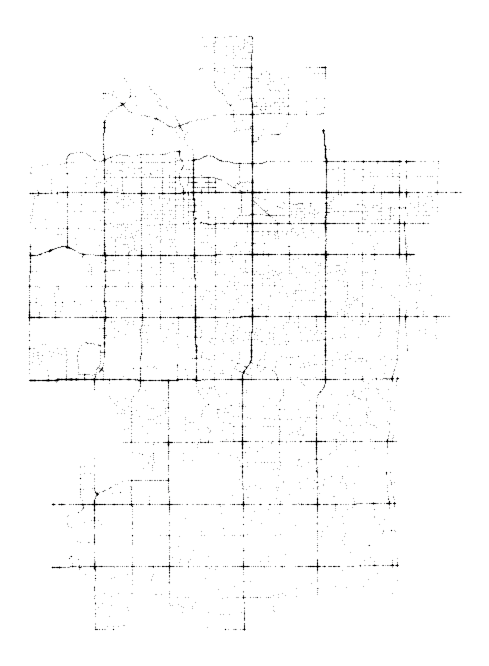

In [26]:
gdf.plot(markersize=0.01, edgecolor='black',figsize=(12,12));
plt.axis('off');

In [27]:
from folium.plugins import MarkerCluster
gdf_sample = gdf1.sample(5000)
lons = gdf_sample.geometry.x
lats = gdf_sample.geometry.y

m = folium.Map(
    location=[np.mean(lats), np.mean(lons)],
    tiles='Cartodb Positron',
    zoom_start=6
)

#FastMarkerCluster(data=list(zip(lats, lons))).add_to(m)
MarkerCluster(list(zip(lats, lons))).add_to(m)

folium.LayerControl().add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

In [28]:
gdf_sample = gdf1.sample(5000)
lons = gdf_sample.geometry.x
lats = gdf_sample.geometry.y
heat_cols = list(zip(lats, lons))
from folium.plugins import HeatMap

m = folium.Map([np.mean(lats), np.mean(lons)], 
               tiles='CartoDB dark_matter', 
               zoom_start=6)

HeatMap(heat_cols).add_to(m)
m

## Analiza podataka

Koristim DataFrame umjesto GeoDataFrame kako bih bio siguran da će se podaci normalno učitati u regresijski model. Izbacujem stupce za numeriranje objekata, jer DataFrame ima vlastito numeriranje redaka.

In [29]:
df = pd.DataFrame(gdf.drop(["geometry", "OBJECTID", "Incidentid"], axis=1))
df.head()

,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,Totalfatalities,Injuryseverity,Collisionmanner,Lightcondition,Weather,SurfaceCondition,Unittype_One,Age_Drv1,Gender_Drv1,Traveldirection_One,Unitaction_One,Violation1_Drv1,AlcoholUse_Drv1,DrugUse_Drv1,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Year,Month,Date,Hour,Minute
0,Rural Rd,University Dr,0.000,Not Junction Related,0,0,No Injury,ANGLE (Front To Side)(Other Than Left Turn),Dark Lighted,Clear,Dry,Driver,255.0,0,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,Driver,32.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,2012,1,10,22,55
1,Mcclintock Dr,State Route 202 Exit 8 A-Ramp,-533.808,Intersection Related Non Interchange,3,0,Non Incapacitating Injury,Rear End,Daylight,Clear,Dry,Driver,26.0,Female,North,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,21.0,Female,North,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,2012,1,10,7,55
2,Priest Dr,Darrow Dr,170.016,Not Junction Related,0,0,No Injury,Sideswipe Same Direction,Daylight,Clear,Dry,Driver,19.0,Male,South,Changing Lanes,Unsafe Lane Change,No Apparent Influence,No Apparent Influence,Driver,56.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,2012,1,10,8,43
3,Baseline Rd,Price Rd,-24.816,Intersection Related Interchange,0,0,No Injury,Rear End,Daylight,Clear,Dry,Driver,43.0,Male,East,Going Straight Ahead,Inattention Distraction,No Apparent Influence,No Apparent Influence,Driver,62.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,2012,1,10,9,4
4,Southern Ave,Price Rd,-617.760,Not Junction Related,0,0,No Injury,Rear End,Daylight,Clear,Dry,Driver,34.0,Male,East,Going Straight Ahead,Speed To Fast For Conditions,No Apparent Influence,No Apparent Influence,Driver,255.0,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,2012,1,10,11,23


Prije obrade podataka kategoričke vrijednosti pretvaram u numeričke.

In [30]:
df["Injuryseverity"] = df["Injuryseverity"].replace({"No Injury": 0, "Possible Injury": 1, "Suspected Minor Injury": 2, "Non Incapacitating Injury":3, "Suspected Serious Injury":4, "Incapacitating Injury": 5, "Fatal": 6})

In [31]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
lblE = LabelEncoder()
le_name_mapping = []
column_name = []
for i in df:
    if df[i].dtype == 'object':
        lblE.fit(df[i])
        df[i] = lblE.transform(df[i])
        le_name_mapping.append(dict(zip(lblE.classes_, lblE.transform(lblE.classes_))))
        column_name.append(i)

Izlažem popis svih kodiranih kategoričkih vrijednosti.

In [32]:
# tablica svih kodiranih stringova
for i in range(0,len(column_name)):
  print(column_name[i])
  print(le_name_mapping[i])

StreetName
{'0': 0, '10th Pl': 1, '10th St': 2, '11th St': 3, '12th Pl': 4, '12th St': 5, '13th St': 6, '14th St': 7, '15th St': 8, '16th St': 9, '17th Pl': 10, '17th St': 11, '18th St': 12, '19th St': 13, '1st St': 14, '21st St': 15, '22nd St': 16, '23rd St': 17, '24th St': 18, '2nd St': 19, '3rd St': 20, '48th St': 21, '4th St': 22, '52nd St': 23, '55th St': 24, '56th St': 25, '5th St': 26, '68th St': 27, '6th St': 28, '71st St': 29, '7th St': 30, '8th St': 31, '9th St': 32, 'Aepli Dr': 33, 'Alameda Dr': 34, 'Albert Ave': 35, 'Alder Dr': 36, 'Alexander Blvd': 37, 'All America Way': 38, 'Alpha Dr': 39, 'Amanda Ln': 40, 'Anozira Pkwy': 41, 'Anozira Pkwyn': 42, 'Anozira Pkwys': 43, 'Apache Blvd': 44, 'Apartments (803)': 45, 'Apollo Ave': 46, 'Arizona Grand Pkwy': 47, 'Arizona Mills Access E': 48, 'Arizona Mills Cir': 49, 'Arizona Mills Conn': 50, 'Arizona Mills S': 51, 'Ash Ave': 52, 'Aspen Dr': 53, 'Aster St': 54, 'Athletes Pl': 55, 'Auburn Dr': 56, 'Auto Dr': 57, 'Autoplex Loop': 58, 

Promatram korelaciju svih parametara međusobno.

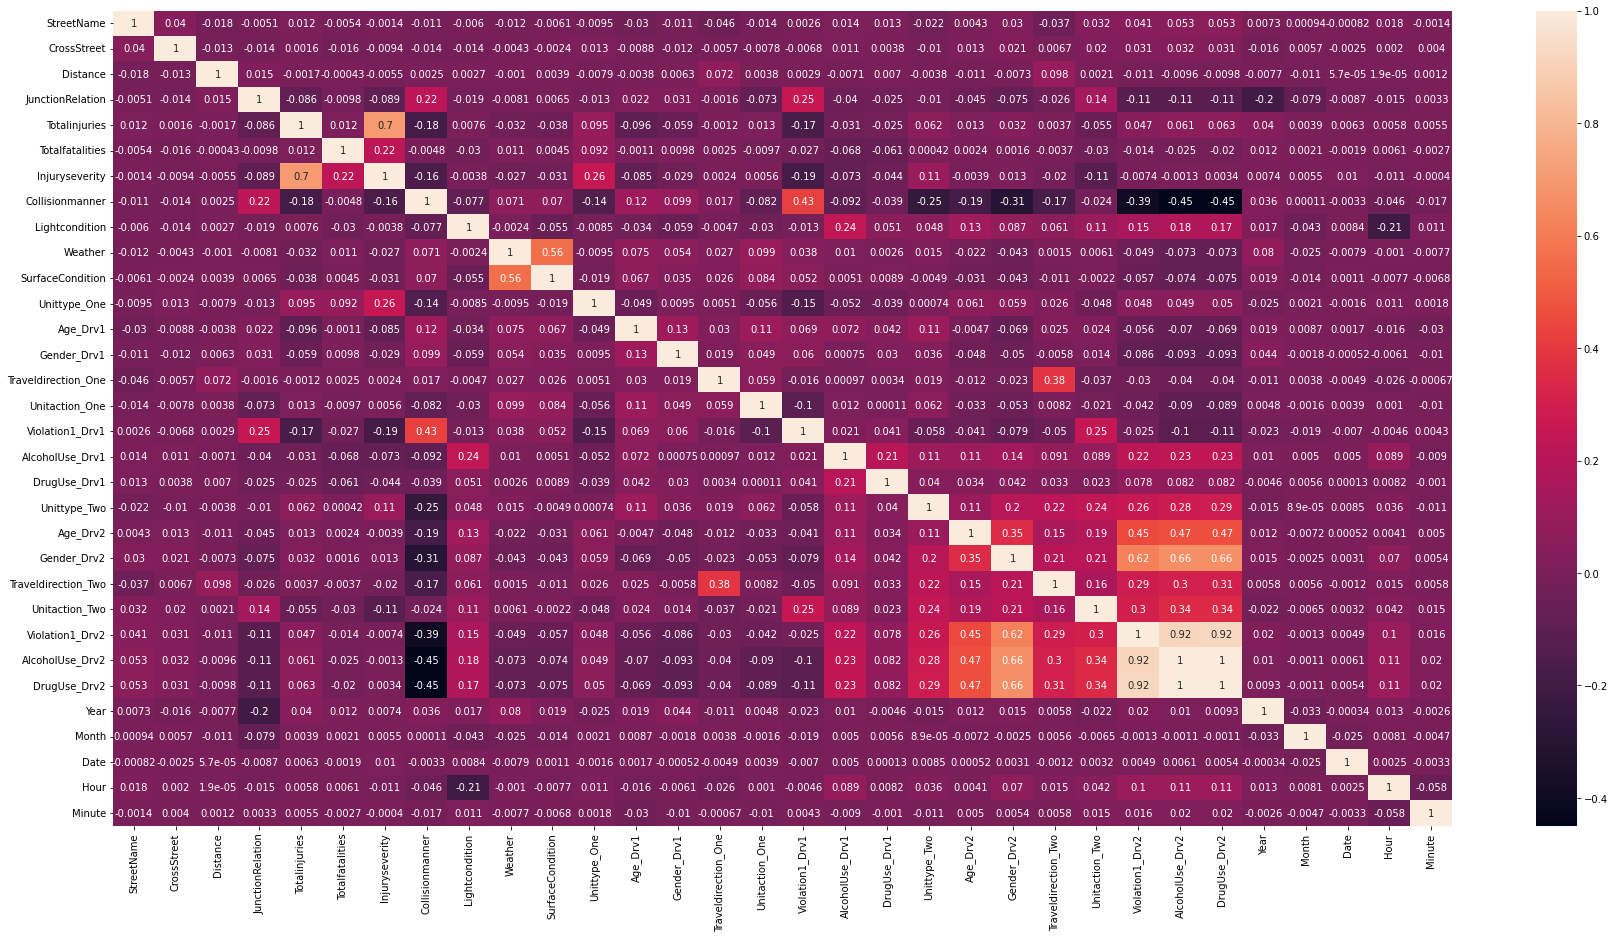

In [33]:
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(df.corr(), annot=True, ax=ax)

Parametar koji će se predviđati (broj ozljeda) je očekivano jako koreliran s parametrom težine najteže ozljede. Ni s čim drugim ovaj parametar nema značajnu korelaciju. Može se stoga očekivati da će korjenski čvor stabla odluke biti vezan uz parametar "Injuryseverity", te će i točnost modela jako ovisiti o tom parametru.
<br>
Od korelacija među ostalim parametrima najveća je korelacija među prekršajima drugog sudionika. Razlog tome je taj što drugi sudionik najčešće nema niti jednu vrstu prekršaja. Postoje i očekivane djelomične korelacije vremenskih uvjeta i uvjeta na kolniku, te prekršaja prvog vozača i tipa sudara. Malo su manje djelomične korelacije doba i spola drugog sudionika i njihovih prekršaja.

Na sljedećim grafovima promatram brojeve slučajeva pod određenim uvjetima.

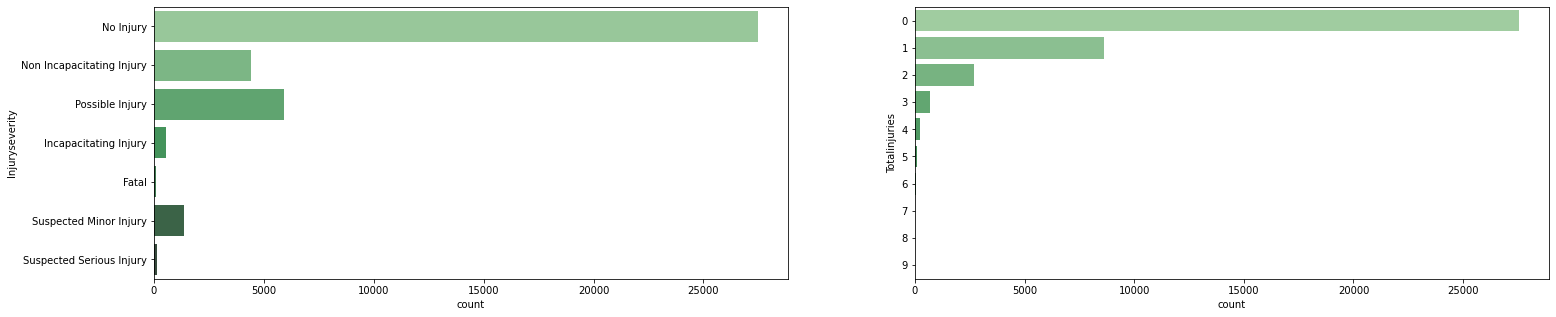

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (25, 5));
sns.countplot(y="Injuryseverity",data=gdf, palette="Greens_d",ax = ax[0]);
sns.countplot(y="Totalinjuries",data=df, palette="Greens_d",ax = ax[1]);

Na lijevom grafu prikazan je broj nesreća sa određenom težinom ozljede, a na desnom grafu broj nesreća sa određenim brojem ozljeda. U broj ozljeda nesreće ne spadaju smrtni slučajevi, za koje vidimo iz lijevog grafa da ih ima relativno malo. To je argument zašto bi broj ozljeda bio pogodniji parametar za predviđanje. Argument protiv predviđanja broja ozljeda je taj što veći broj ozljeda ujedno ne znači veću težinu ozljeda.

#### Sudionici

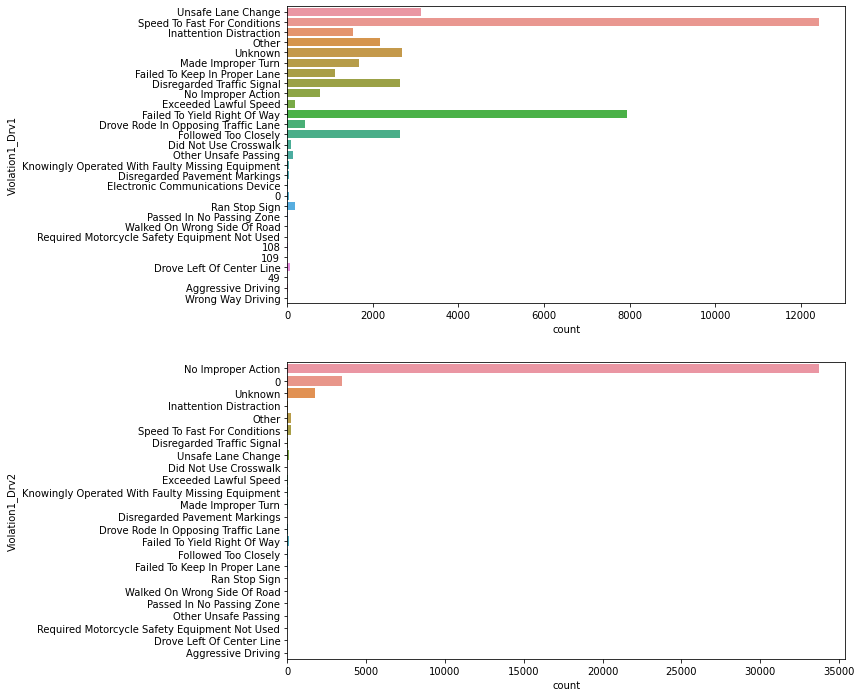

In [35]:
fig, ax = plt.subplots(2, 1, figsize = (10, 12), );

sns.countplot(y='Violation1_Drv1',data=gdf, ax=ax[0])
sns.countplot(y='Violation1_Drv2',data=gdf, ax=ax[1])

Na prethodnim grafovima prikazan je broj prekršaja počinjenih od strane prvog, odnosno drugog sudionika. Vidljivo je da je prvi sudionik u velikoj većini slučajeva odgovoran za nesreću, dok drugi nema prekršaja.

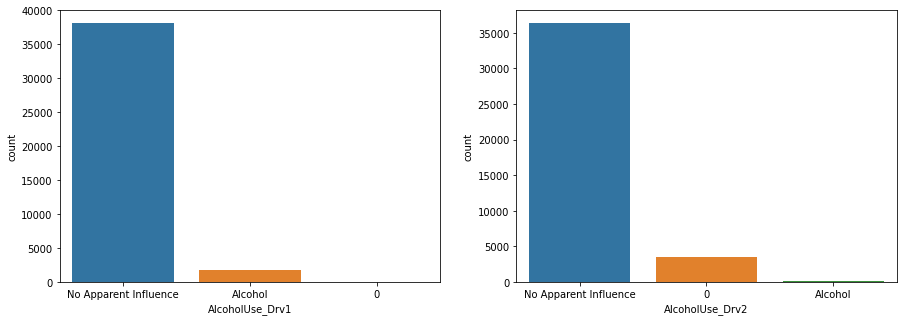

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5));

sns.countplot(x='AlcoholUse_Drv1',data=gdf, ax=ax[0])
sns.countplot(x='AlcoholUse_Drv2',data=gdf, ax=ax[1])

Na prethodnim grafovima prikazan je broj slučajeva u kojima je prvi, odnosno drugi sudionik bio pod utjecajem alkohola. Ovdje također vidimo da je većinom prvi sudionik u prekršaju.

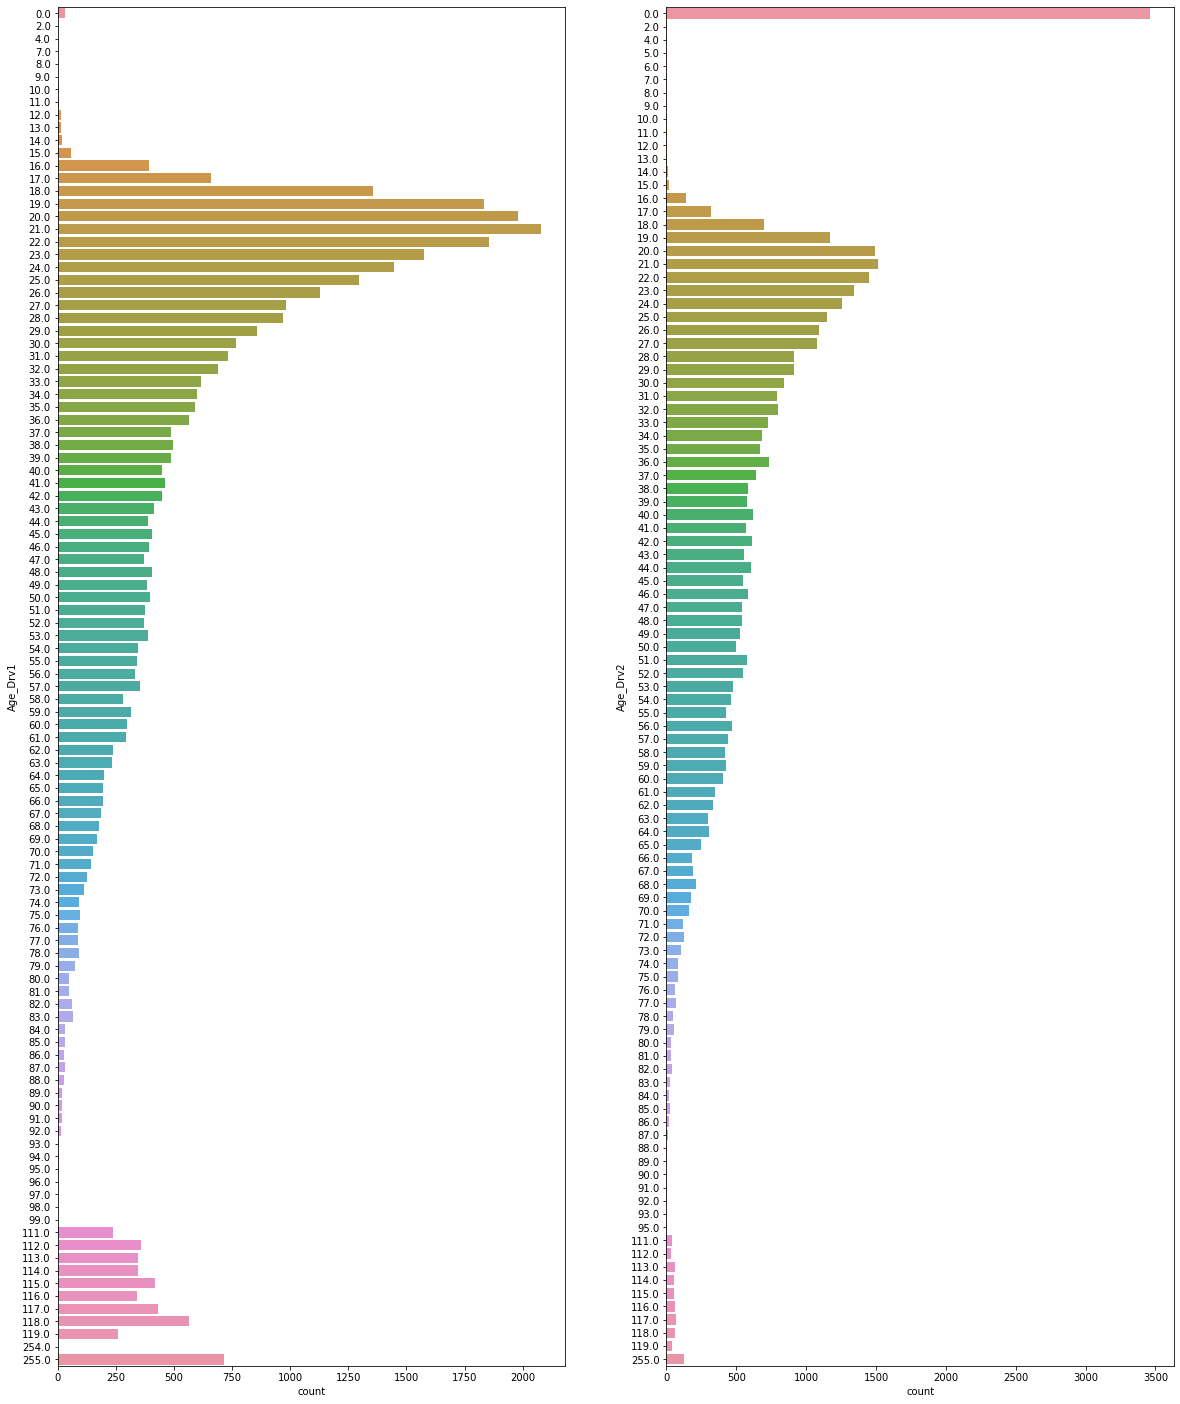

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (20, 25));

sns.countplot(y='Age_Drv1',data=gdf, ax=ax[0])
sns.countplot(y='Age_Drv2',data=gdf, ax=ax[1])

Na prethodnim grafovima prikazan je broj sudionika određene starosti. Postoji određeni broj netočnih informacija (godine veće od 100) koje imaju približno jednoliku raspodijelu, te su vjerojatno nasumično raspodijeljene po svim parametrima, pa očekujemo da model ne će zaključiti ništa na temelju njih.

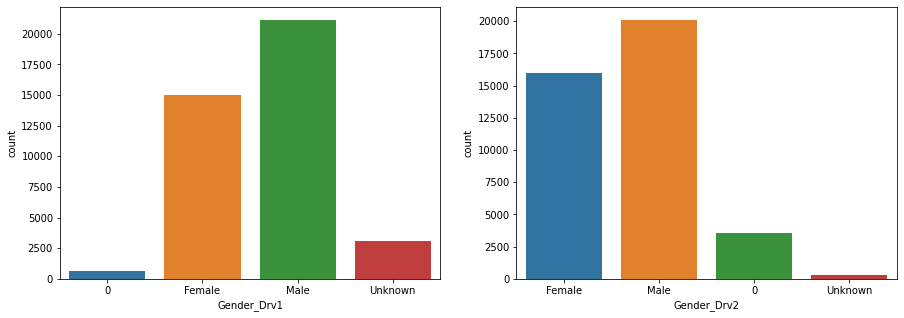

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5));

sns.countplot(x='Gender_Drv1',data=gdf, ax=ax[0])
sns.countplot(x='Gender_Drv2',data=gdf, ax=ax[1])

Iz prethodinih podataka možemo zaključiti da je korelacija između doba i spola drugog sudionika s njegovim prekršajima mogla doći od toga što ima puno nezapisanih podataka o dobu i spolu sudionika, bilo zato što ih nema ili zato što se radi o samovozečem vozilu, a označeni su nulom kao i mnogi prekršaji drugog sudionika. 

#### Stanje na cesti

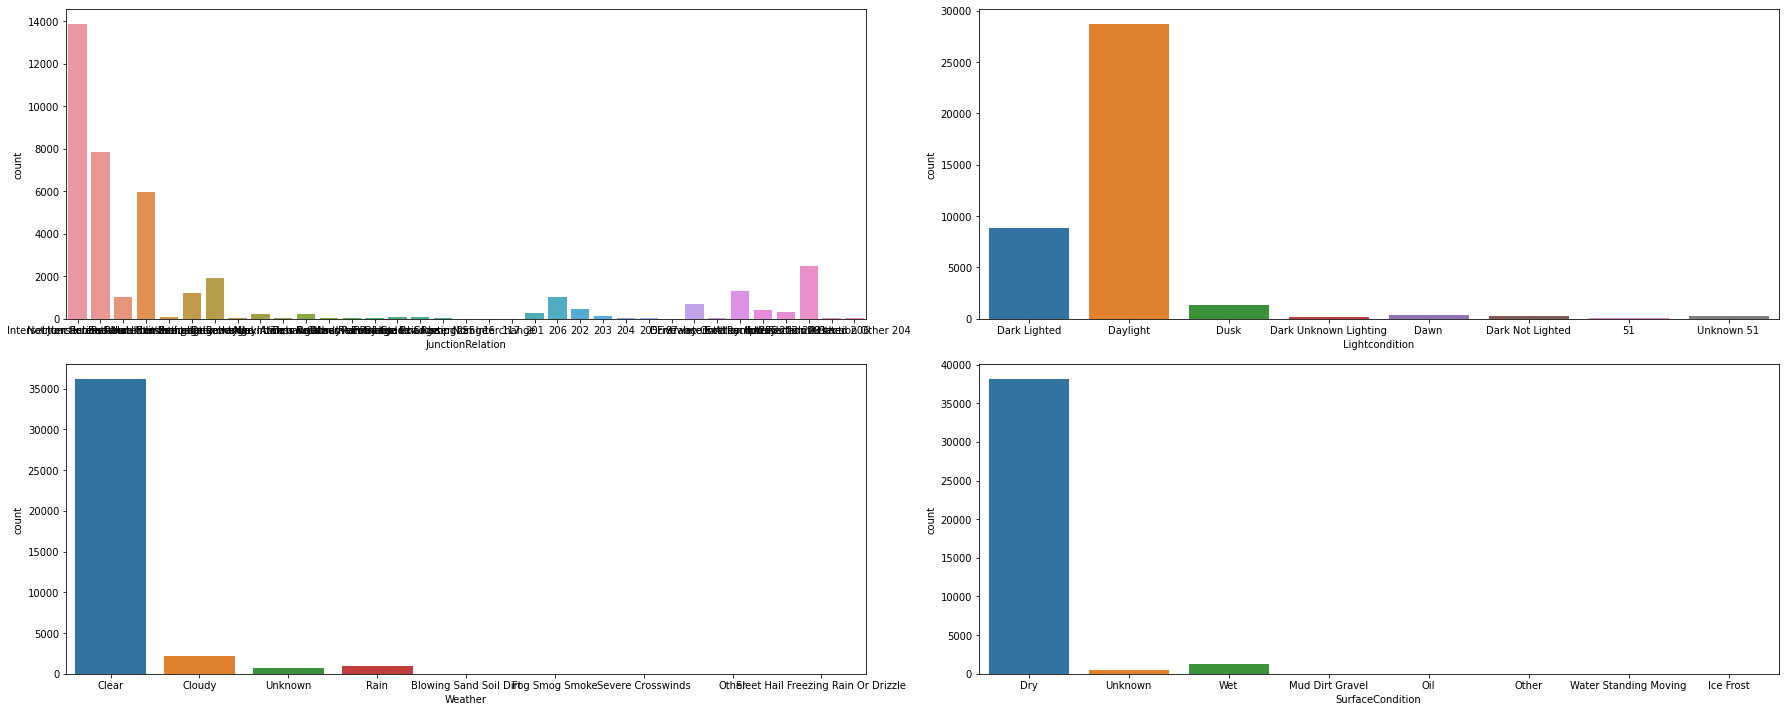

In [39]:
fig, ax = plt.subplots(2, 2, figsize = (25, 10));

sns.countplot(x='JunctionRelation',data=gdf, ax=ax[0,0])
sns.countplot(x="Lightcondition",data=gdf,  ax=ax[0,1])
sns.countplot(x='Weather',data=gdf, ax=ax[1,0])
sns.countplot(x='SurfaceCondition',data=gdf, ax=ax[1,1])
#intersectionMidblock
plt.tight_layout()

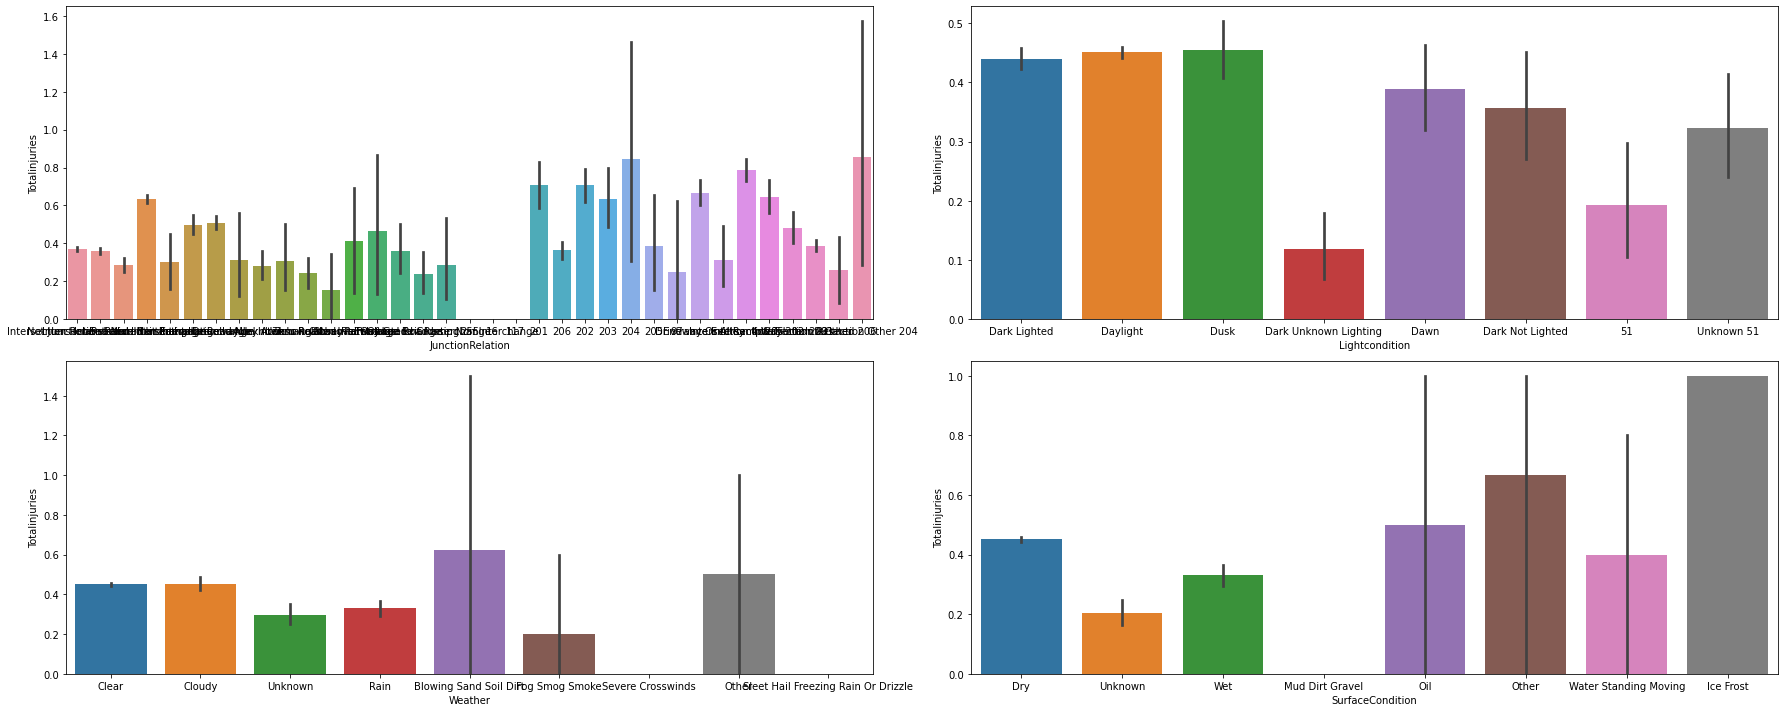

In [40]:
fig, ax = plt.subplots(2, 2, figsize = (25, 10));

sns.barplot(x='JunctionRelation', y='Totalinjuries', data=gdf, ax=ax[0,0])
sns.barplot(x="Lightcondition", y='Totalinjuries', data=gdf,  ax=ax[0,1])
sns.barplot(x='Weather', y='Totalinjuries', data=gdf, ax=ax[1,0])
sns.barplot(x='SurfaceCondition', y='Totalinjuries', data=gdf, ax=ax[1,1])
#intersectionMidblock
plt.tight_layout()

## Obrada podataka strojnim učenjem

Kao zavisni parametar, odnosno parametar koji će model predviđati biram ukupan broj ozljeda ("Totalinjuries"), a parametar "Injuryseverity" izbacujem, zbog visoke korelacije.

In [41]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [42]:
X = df.drop(["Totalinjuries", "Injuryseverity"], axis=1)
y = df["Totalinjuries"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Prvo stvaram obično stablo odluke za predviđanje broja ozljeda.

In [44]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image 
import pydotplus

In [45]:
def print_score(m):
    res = [m.score(X_train, y_train), 
           m.score(X_test, y_test)]
    print ("Train score: {} , Test score: {}".format(res[0], res[1]))

In [46]:
stablo = DecisionTreeRegressor()
stablo.fit(X_train, y_train)

DecisionTreeRegressor()

In [47]:
print_score(stablo)

Train score: 1.0 , Test score: -1.134256641071202


Model je prenaučen.

In [48]:
stablo = DecisionTreeRegressor(max_depth=10, max_leaf_nodes=15)
stablo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=15)

In [49]:
print_score(stablo)

Train score: 0.08308693935011568 , Test score: 0.07602155155195955


Pratim ovisnost R2 točnosti o hiperparametrima stabla.

Index with max score: 5
Score: 0.07656557579273238


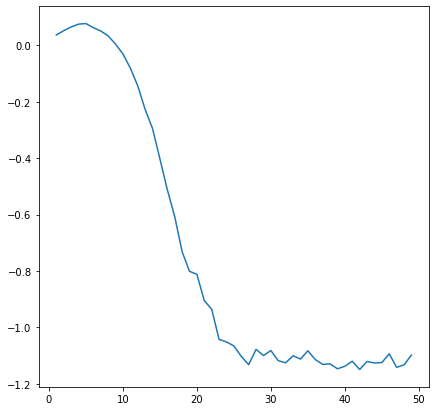

In [50]:
# Pratim ovisnost score stabla odluke o max_depth
tocnosti = []

for i in range(1,50):
  stablo = DecisionTreeRegressor(max_depth=i)
  stablo.fit(X_train, y_train)
  tocnosti.append(stablo.score(X_test, y_test))

plt.figure(figsize=(7,7))
plt.plot(range(1,50), tocnosti)
print("Index with max score: {}".format(np.argmax(tocnosti)+1))
print("Score: {}".format(np.max(tocnosti)))

Index with max score: 16
Score: 0.07879271683201083


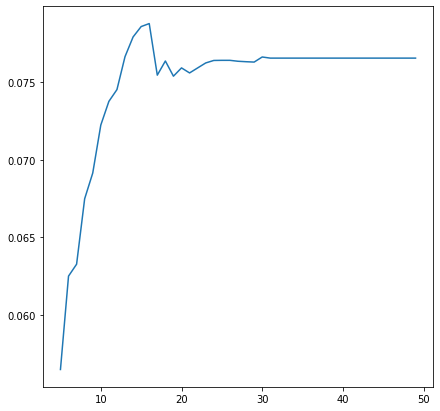

In [51]:
# Pratim ovisnost score stabla odluke o  max_leaf_nodes
tocnosti = []

for i in range(5,50):
  stablo = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=i)
  stablo.fit(X_train, y_train)
  tocnosti.append(stablo.score(X_test, y_test))

plt.figure(figsize=(7,7))
plt.plot(range(5,50), tocnosti)
print("Index with max score: {}".format(np.argmax(tocnosti)+5))
print("Score: {}".format(np.max(tocnosti)))

Index with max score: 1
Score: 0.07879271683201083


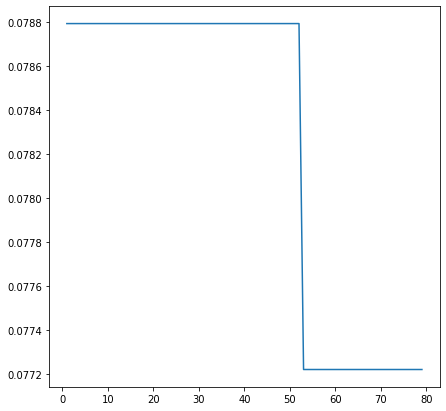

In [52]:
# Pratim ovisnost score stabla odluke o  min_samples_leaf
tocnosti = []

for i in range(1,80):
  stablo = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=16, min_samples_leaf=i)
  stablo.fit(X_train, y_train)
  tocnosti.append(stablo.score(X_test, y_test))

plt.figure(figsize=(7,7))
plt.plot(range(1,80), tocnosti)
print("Index with max score: {}".format(np.argmax(tocnosti)+1))
print("Score: {}".format(np.max(tocnosti)))

In [53]:
stablo = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=16)
stablo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=16)

In [54]:
print_score(stablo)

Train score: 0.08415898219061368 , Test score: 0.07879271683201083


Točnost na skupu za testiranje je dostigla 7.8 %. Ta brojka je vrlo mala što sugerira da dani parametri vjerojatno nisu dovoljni za dobro predviđanje. Moguće je također da stablo odluke ne može dati dovoljnu točnost, zbog visoke varijance.

Vizualiziram stablo odluke.

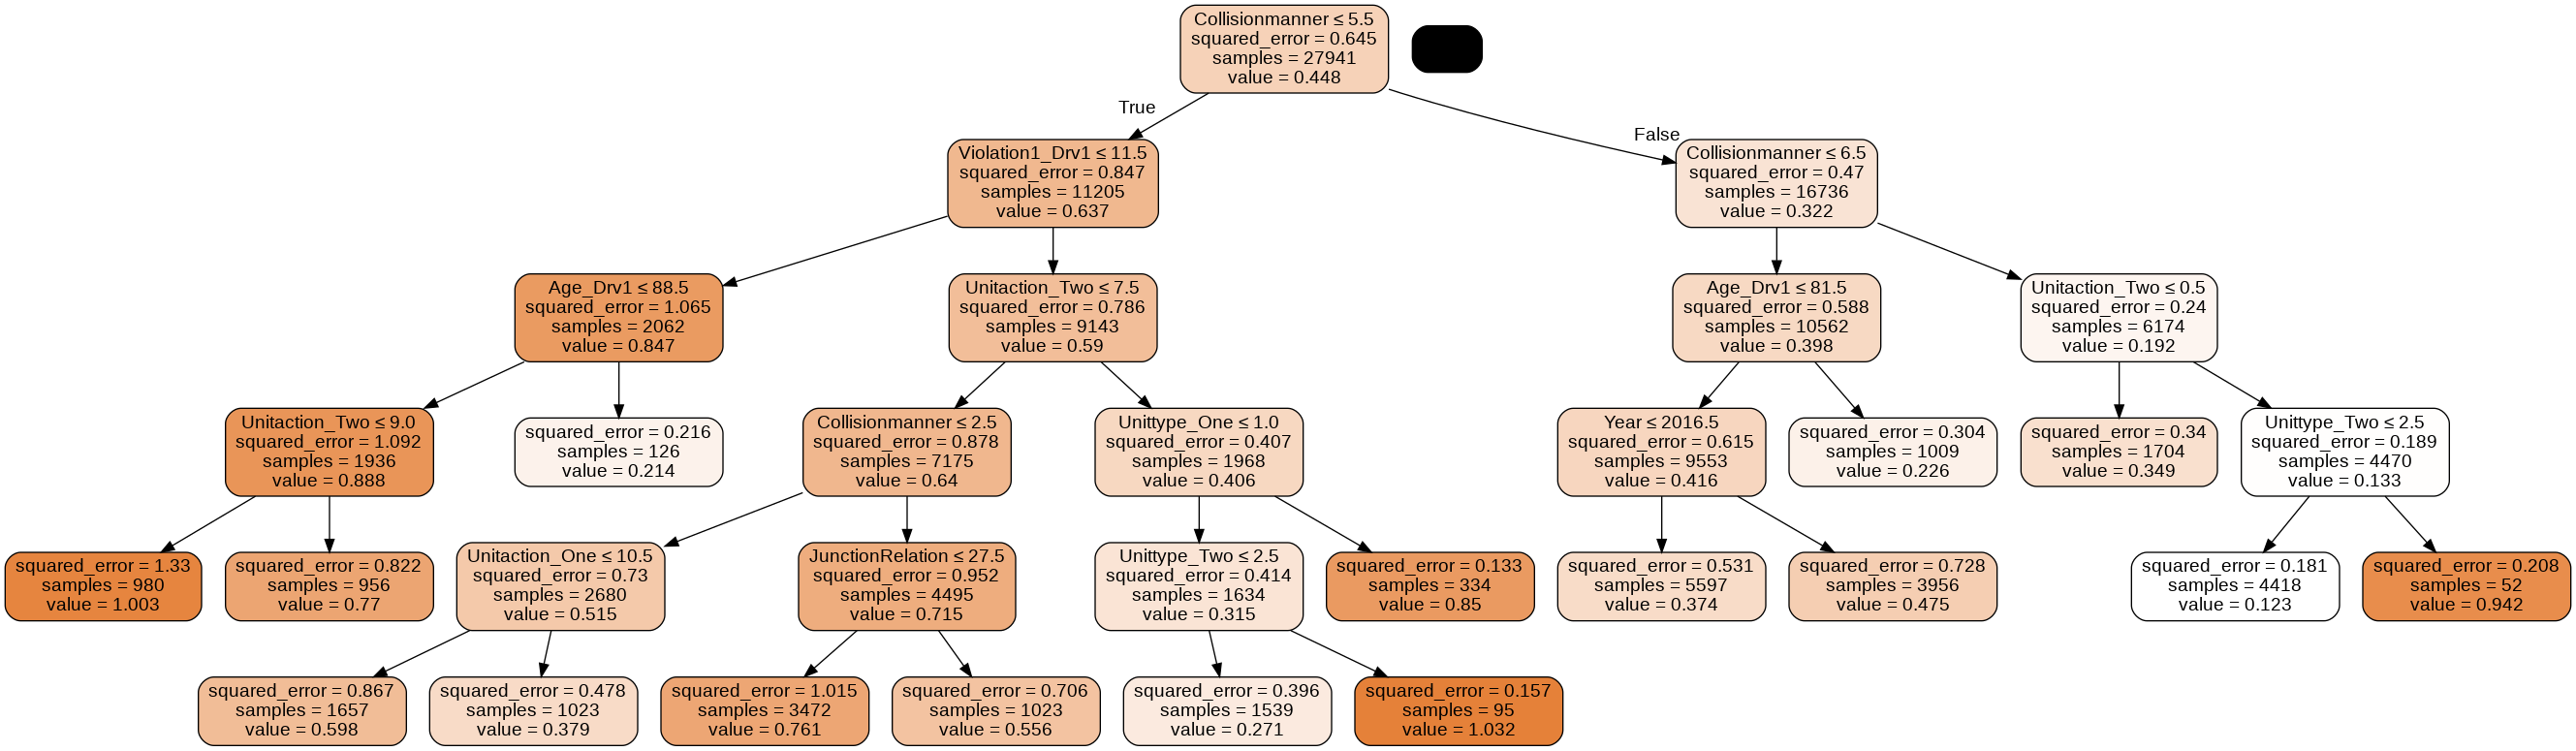

In [55]:
dot_data = StringIO()
export_graphviz(stablo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('prometna sigurnost - Tempe.png')
Image(graph.create_png())

Uz pomoć metode slučajnih šuma može se povećati točnost, s obzirom da ona rješava problem visoke varijance stabla odluke.

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
model = RandomForestRegressor(n_estimators=50, max_depth=5, max_leaf_nodes=16)

In [58]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_leaf_nodes=16, n_estimators=50)

In [59]:
print_score(model)

Train score: 0.09323360437920114 , Test score: 0.08650016795185334


Pratim ovisnost točnosti o nekim hiperparametrima.

Index with max score: 44
Score: 0.0878609636126666


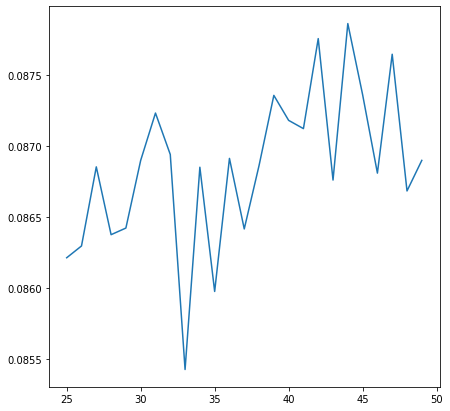

In [60]:
# Pratim ovisnost score slučajne šume o n_estimators
tocnosti = []

for i in range(25,50):
  model = RandomForestRegressor(n_estimators=i, max_depth=5, max_leaf_nodes=16)
  model.fit(X_train, y_train)
  tocnosti.append(model.score(X_test, y_test))

plt.figure(figsize=(7,7))
plt.plot(range(25,50), tocnosti)
print("Index with max score: {}".format(np.argmax(tocnosti)+25))
print("Score: {}".format(np.max(tocnosti)))

In [61]:
model = RandomForestRegressor(n_estimators=44, max_depth=10, max_features=0.5, max_leaf_nodes=50)

In [62]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.5, max_leaf_nodes=50,
                      n_estimators=44)

In [63]:
print_score(model)

Train score: 0.12904453075853017 , Test score: 0.09184353413843471


In [64]:
model = RandomForestRegressor(n_estimators=44, max_depth=10, max_features=0.6, max_leaf_nodes=50)

In [65]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.6, max_leaf_nodes=50,
                      n_estimators=44)

In [66]:
print_score(model)

Train score: 0.1302297625783404 , Test score: 0.09252460415844843


In [67]:
model = RandomForestRegressor(n_estimators=44, max_depth=10, max_features=0.6, max_leaf_nodes=50, min_samples_split=50)

In [68]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.6, max_leaf_nodes=50,
                      min_samples_split=50, n_estimators=44)

In [69]:
print_score(model)

Train score: 0.12802688719602173 , Test score: 0.09584102158826335


Slučajne šume su manje interpretabilne nego stabla odluke, ali i dalje se može pokušati zaključivati iz njih. Jedan od načina je i promatranje mjere važnosti parametara dobivene iz slučajne šume.

In [70]:
f_imp = pd.DataFrame(data={'importance':model.feature_importances_,'features':X_train.columns}).set_index('features')
f_imp = f_imp.sort_values('importance', ascending=False)
f_imp.head(10)

,importance
features,
Collisionmanner,0.296278
Violation1_Drv1,0.130037
Unitaction_One,0.080784
Age_Drv1,0.061285
Distance,0.060956
Unitaction_Two,0.059277
Unittype_Two,0.049817
JunctionRelation,0.046436
Year,0.033704


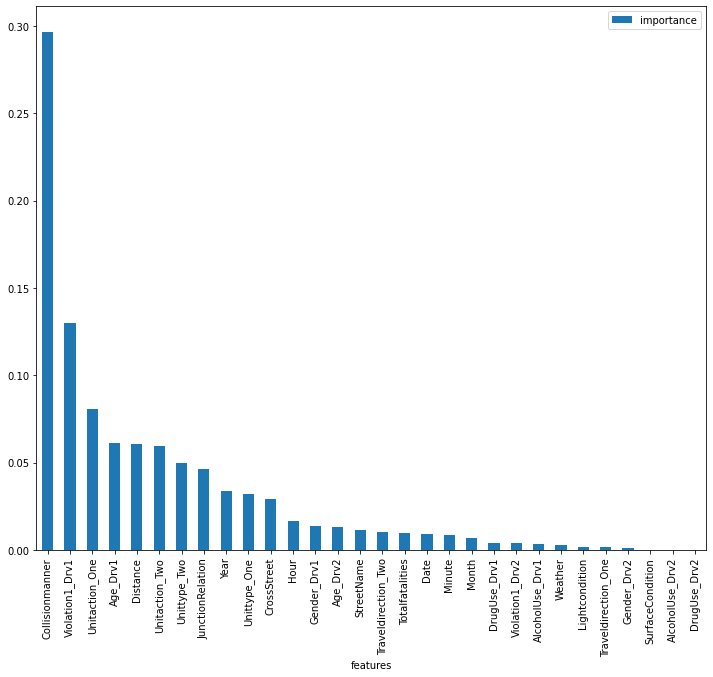

In [71]:
f_imp.plot(kind='bar', figsize=(12,10))

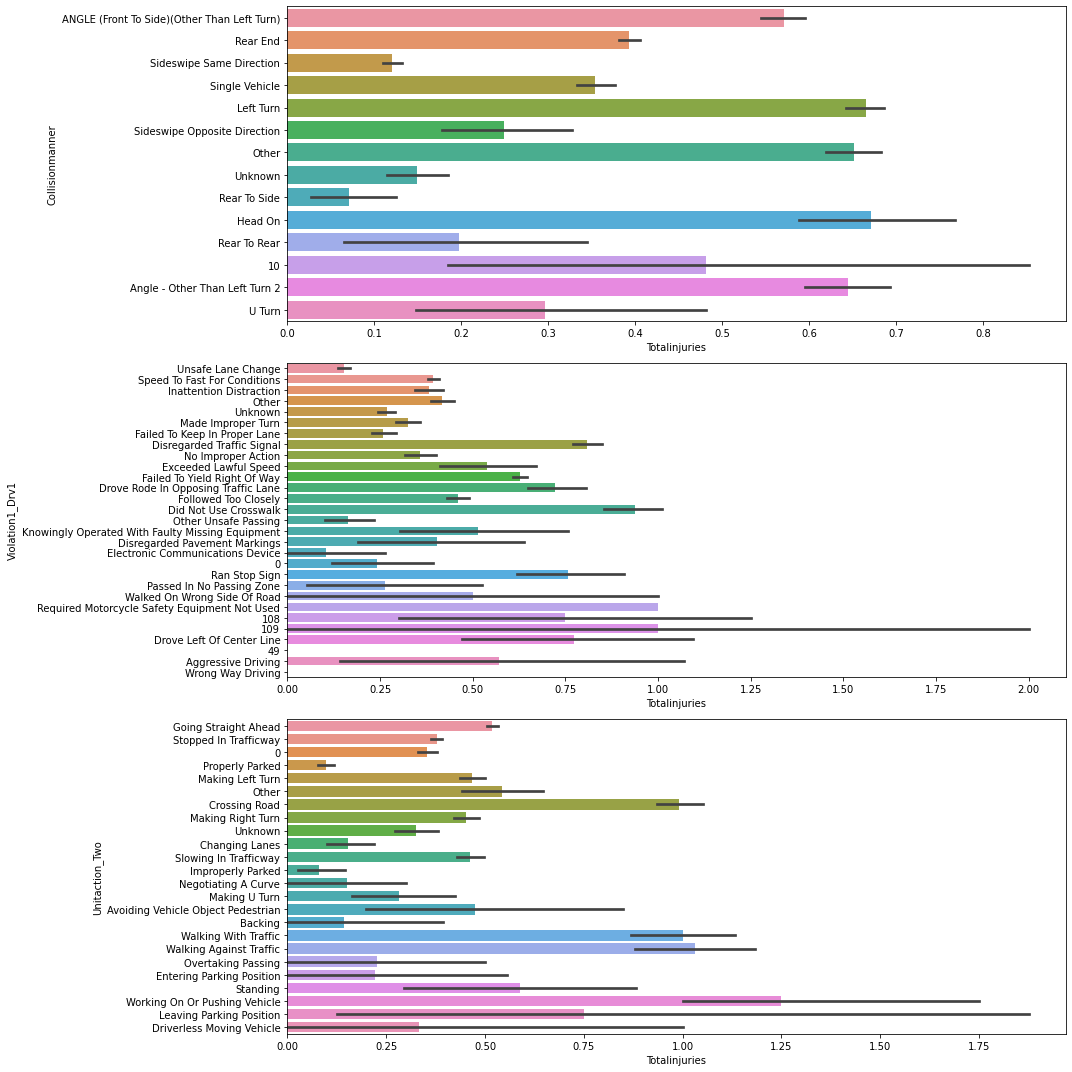

In [72]:
fig, ax = plt.subplots(3, 1, figsize = (15, 15));

sns.barplot(y='Collisionmanner', x='Totalinjuries', data=gdf, ax=ax[0])
sns.barplot(y="Violation1_Drv1", x='Totalinjuries', data=gdf,  ax=ax[1])
sns.barplot(y='Unitaction_Two', x='Totalinjuries', data=gdf, ax=ax[2])
#intersectionMidblock
plt.tight_layout()

## Zaključak

Metodom slučajnih šuma malo je povećana točnost modela u odnosu na točnost stabla odluke. Točnost je i dalje vrlo mala (manje od 10%) što ukazuje da parametri nisu dovoljni za nalaženje značajne pravilnosti. Točnost bi bila veća da je parametar težine najteže ozljede uzet u razmatranje, međutim takav model nam nije jako informativan, s obzirom da znamo za jaku korelaciju s brojem ozljeda. Model bi se mogao poboljšati tako da se prebacimo na klasifikaciju i da predviđamo težinu najteže ozljede jer se to čini kao konzistentniji parametar od broja ozljeda, za koji nemamo informacije koliko su teške.

## Literatura

- ${[1]}$ https://www.keboola.com/blog/random-forest-regression#:~:text=If%20you%20wish%20to%20speed,very%20heavily%20on%20your%20dataset.
- ${[2]}$ https://gdcoder.com/random-forest-regressor-explained-in-depth/
- https://www.youtube.com/watch?v=wr9gUr-eWdA&t=3919s
- https://towardsdatascience.com/predicting-vehicle-accidents-with-machine-learning-ce956467fa74